# Classificação
Árvore de Decisão obteve 81,4 % de acurácia, precisão de 60,2 % e recall de 62,3 % para a classe “> 50K”, resultando em F1-score de 61,2 %. Como havia muito mais exemplos de “≤ 50K”, as métricas dessa classe ficaram em torno de 87–88 %, o que elevou o weighted-avg para cerca de 81 %.

Já o Random Forest alcançou 85,2 % de acurácia (quase 4 pontos percentuais a mais), com precisão de 71,8 % e recall de 61,2 % para “> 50K”, resultando em F1-score de 66,1 %. Para “≤ 50K”, o modelo acertou 93 % dos casos, elevando o weighted-avg para 85 %.

Portanto, o Random Forest supera a Árvore de Decisão em todas as métricas-chave: maior acurácia geral, ganho significativo em precisão e melhora do F1-score, apesar de pequena queda no recall da classe majoritária. Por isso, o Random Forest é a melhor escolha para este problema de classificação de renda.

In [1]:
%pip install matplotlib
%pip install scikit-learn
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Danilo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Danilo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Danilo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


===== Decision Tree =====
Acurácia:  0.8139106402579457
Precisão: 0.6022655758338578
Recall:    0.6226415094339622
F1-score:  0.6122840690978887
              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      4976
        >50K       0.60      0.62      0.61      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.75      0.74      6513
weighted avg       0.82      0.81      0.81      6513



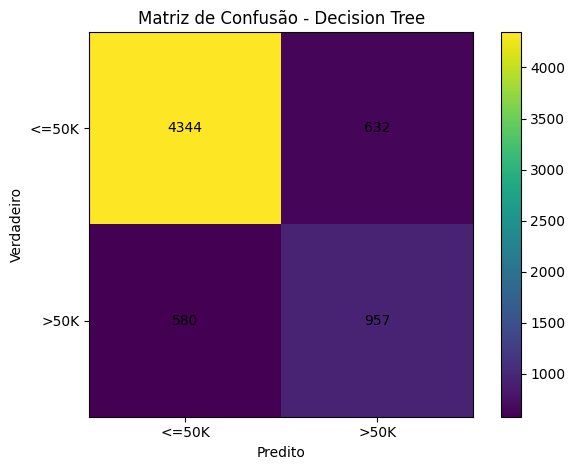

===== Random Forest =====
Acurácia:  0.8518347919545525
Precisão: 0.7183206106870229
Recall:    0.6122316200390371
F1-score:  0.6610467158412364
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4976
        >50K       0.72      0.61      0.66      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



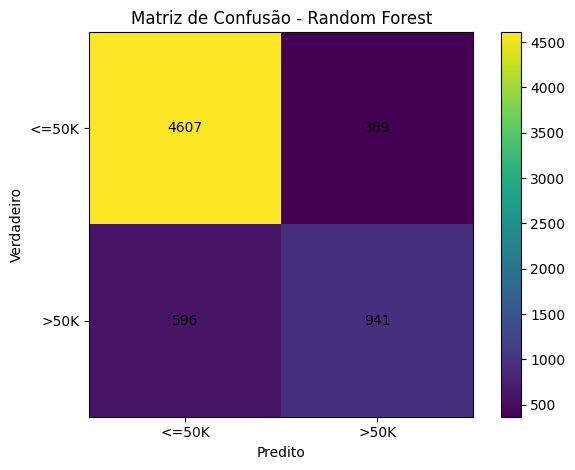

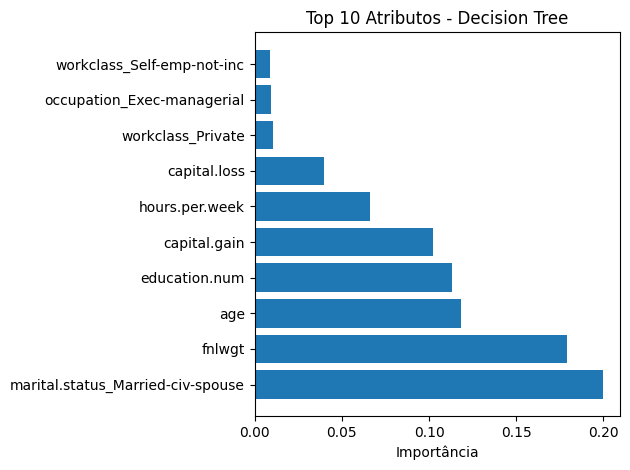

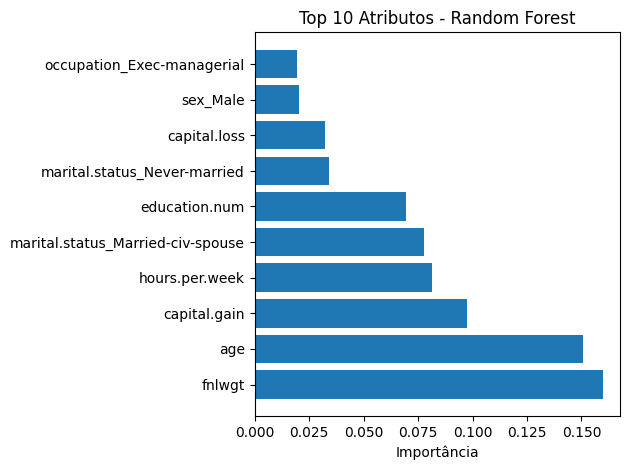

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt

# 1. Carregar e limpar o dataset
df = pd.read_csv('data/adult.csv')
df.replace(' ?', np.nan, inplace=True)
df.dropna(inplace=True)

# 2. Separar features e target
X = df.drop('income', axis=1)
y = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# 3. Codificar variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# 4. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Treinar modelos
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 6. Prever no conjunto de teste
pred_dt = dt.predict(X_test)
pred_rf = rf.predict(X_test)

# 7. Avaliar desempenho e plotar matrizes de confusão
for name, pred in [('Decision Tree', pred_dt), ('Random Forest', pred_rf)]:
    print(f"===== {name} =====")
    print("Acurácia: ", accuracy_score(y_test, pred))
    print("Precisão:", precision_score(y_test, pred))
    print("Recall:   ", recall_score(y_test, pred))
    print("F1-score: ", f1_score(y_test, pred))
    print(classification_report(y_test, pred, target_names=['<=50K', '>50K']))
    
    cm = confusion_matrix(y_test, pred)
    plt.figure()
    plt.imshow(cm, interpolation='nearest')
    plt.title(f"Matriz de Confusão - {name}")
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.colorbar()
    ticks = [0, 1]
    plt.xticks(ticks, ['<=50K', '>50K'])
    plt.yticks(ticks, ['<=50K', '>50K'])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center')
    plt.tight_layout()
    plt.show()

# 8. Importância dos atributos
feat_names = X.columns

# Top 10 para Decision Tree
importances_dt = pd.Series(dt.feature_importances_, index=feat_names)
top_dt = importances_dt.nlargest(10)
plt.figure()
plt.barh(top_dt.index, top_dt.values)
plt.title('Top 10 Atributos - Decision Tree')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()

# Top 10 para Random Forest
importances_rf = pd.Series(rf.feature_importances_, index=feat_names)
top_rf = importances_rf.nlargest(10)
plt.figure()
plt.barh(top_rf.index, top_rf.values)
plt.title('Top 10 Atributos - Random Forest')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()
